In [3]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import defaultdict
import os
import numpy as np
import cv2

In [4]:
df = pd.read_csv(r"C:\Users\inesad00\Downloads\en.openfoodfacts.org.products.csv\en.openfoodfacts.org.products.csv", sep='\t',on_bad_lines='skip')
print(f"The number of rows in the DataFrame is: {df.shape[0]}")

C:\Users\inesad00\AppData\Local\Temp\ipykernel_12240\1130488704.py:1: DtypeWarning: Columns (0,11,17,31,32,33,34,35,45,46,50,52,53,56,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\inesad00\Downloads\en.openfoodfacts.org.products.csv\en.openfoodfacts.org.products.csv", sep='\t',on_bad_lines='skip')


The number of rows in the DataFrame is: 3427907


In [7]:
df_sample = df[:50000]
df_sample.to_csv(r"openfoodfactory.csv",index=False)

In [ ]:
processed = df_sample.drop(columns=['created_t','created_datetime','last_updated_t','last_modified_t','last_modified_datetime','last_modified_datetime','last_updated_datetime'])

Columns related to 'created': ['created_t', 'created_datetime']
Columns related to 'last': ['last_modified_t', 'last_modified_datetime', 'last_modified_by', 'last_updated_t', 'last_updated_datetime', 'last_image_t', 'last_image_datetime']
Columns related to 'product': ['product_name', 'product_quantity']
Columns related to 'packaging': ['packaging', 'packaging_tags', 'packaging_en', 'packaging_text']
Columns related to 'brands': ['brands', 'brands_tags']
Columns related to 'categories': ['categories', 'categories_tags', 'categories_en']
Columns related to 'origins': ['origins', 'origins_tags', 'origins_en']
Columns related to 'manufacturing': ['manufacturing_places', 'manufacturing_places_tags']
Columns related to 'labels': ['labels', 'labels_tags', 'labels_en']
Columns related to 'emb': ['emb_codes', 'emb_codes_tags']
Columns related to 'cities': ['cities', 'cities_tags']
Columns related to 'countries': ['countries', 'countries_tags', 'countries_en']
Columns related to 'ingredients': 

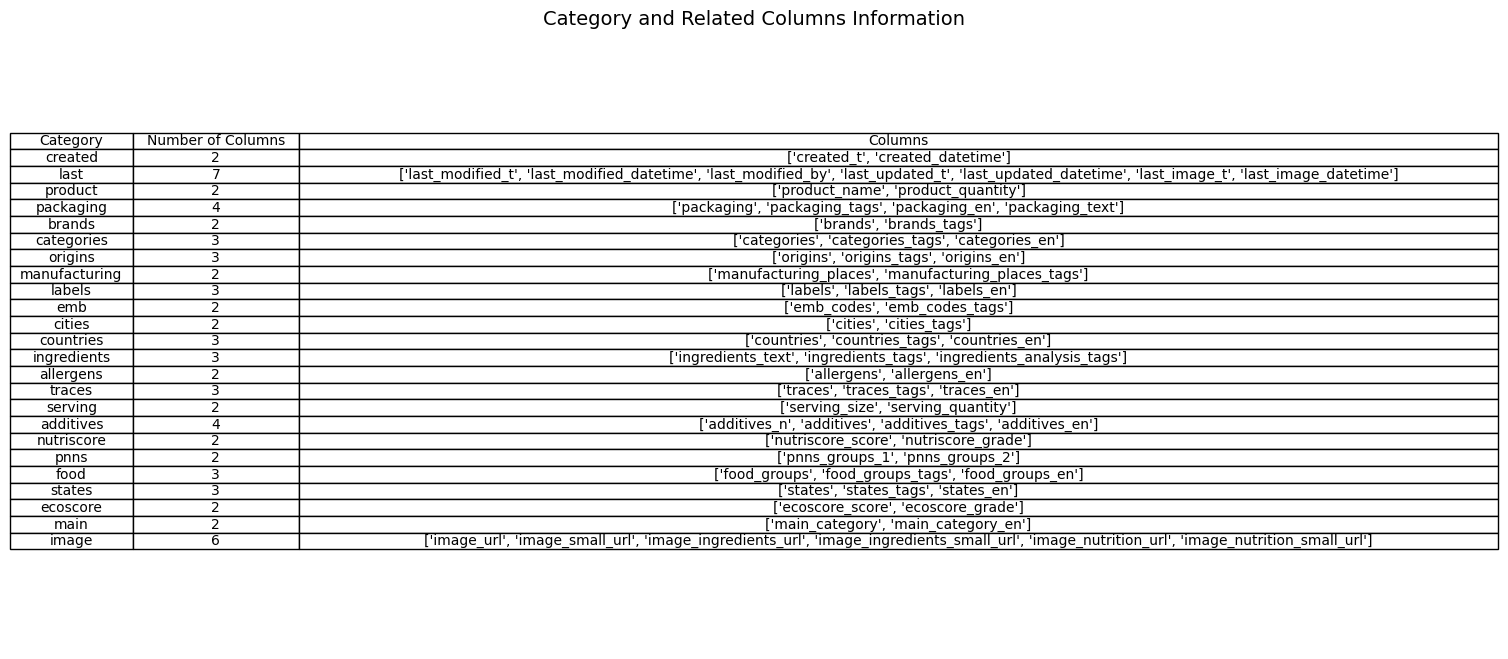

In [ ]:
# Get all column names
columns = df.columns.tolist()

# Initialize a dictionary to store similar columns
similar_columns = defaultdict(list)

# Group columns based on their substrings
for col in columns:
    # Use a common substring for grouping (e.g., splitting by underscores)
    key = col.split('_')[0]  # You can adjust the logic as needed
    similar_columns[key].append(col)

# Remove keys with only one column (if desired)
similar_columns = {k: v for k, v in similar_columns.items() if len(v) > 1}

# Display similar columns
for key, value in similar_columns.items():
    print(f"Columns related to '{key}': {value}")

# Convert dictionary to DataFrame
df = pd.DataFrame([(key, len(value), value) for key, value in similar_columns.items()],
                  columns=['Category', 'Number of Columns', 'Columns'])

# Plot the table in a graph
fig, ax = plt.subplots(figsize=(12, 8))  # Set figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Auto-adjust column width
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Show the table as a graph
plt.title('Category and Related Columns Information', fontsize=14)
plt.show()

In [ ]:
req_cols = list(processed.loc[:,'energy-kj_100g':].columns)
req_cols.extend(('categories_en', 'brands_tags', 'allergens_en', 'serving_quantity', 'ingredients_tags', 'image_ingredients_url', 'image_nutrition_url'))


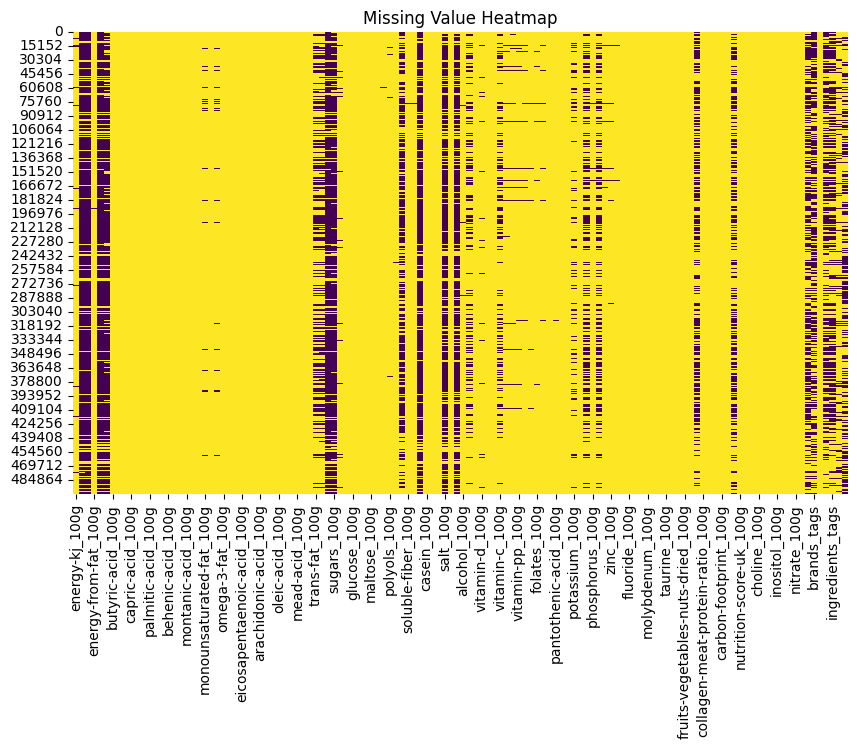

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(processed[req_cols].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

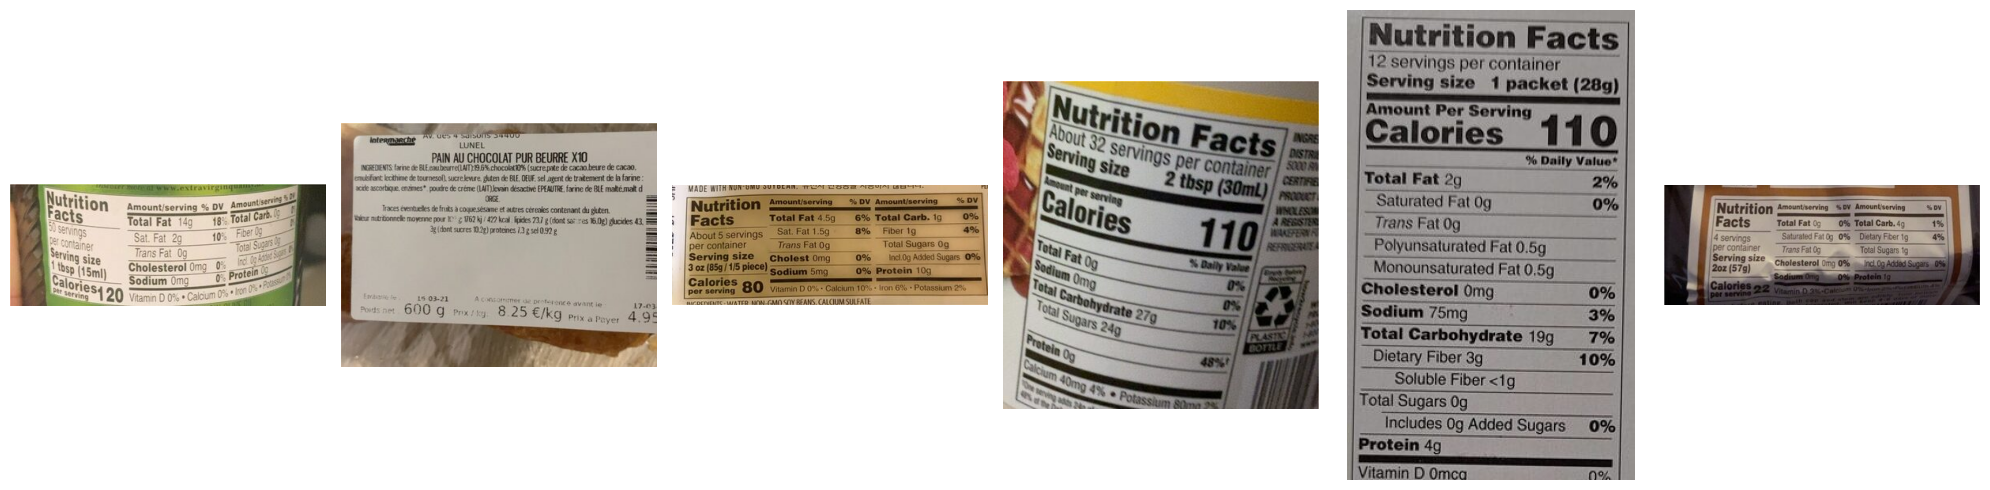

In [74]:


# Assuming 'image_url' is the column name in your DataFrame that contains the URLs
def plot_sample_images(df, url_column, sample_size=5):
    # Randomly sample URLs from the DataFrame
    sample_urls = df[url_column].dropna().sample(n=sample_size).values

    # Plot images in subplots
    fig, axes = plt.subplots(1, sample_size, figsize=(20, 5))

    for i, url in enumerate(sample_urls):
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# Replace 'your_dataframe' with your actual DataFrame and 'image_url_column' with the correct column name

plot_sample_images(df_sample[~df_sample['image_nutrition_url'].isna()], 'image_nutrition_url', sample_size=6)

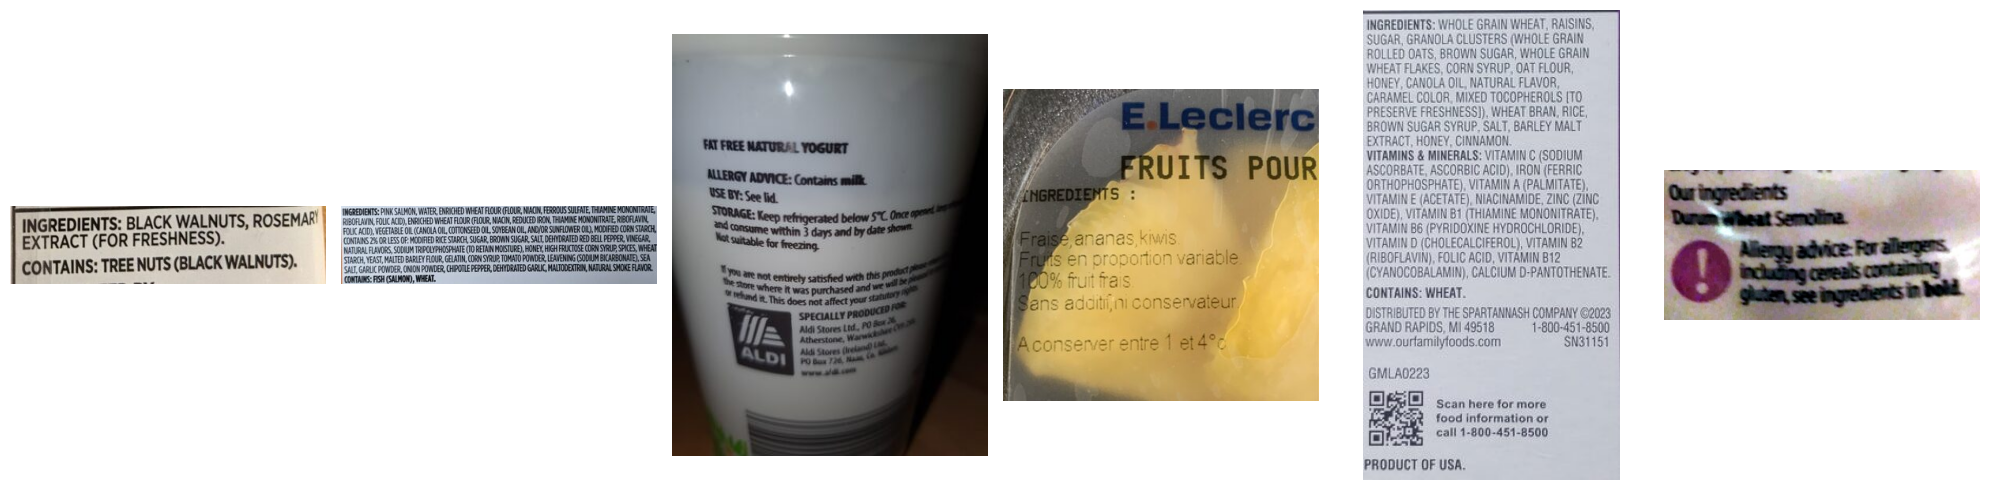

In [85]:
plot_sample_images(df_sample[~df_sample['image_ingredients_url'].isna()], 'image_ingredients_url', sample_size=6)

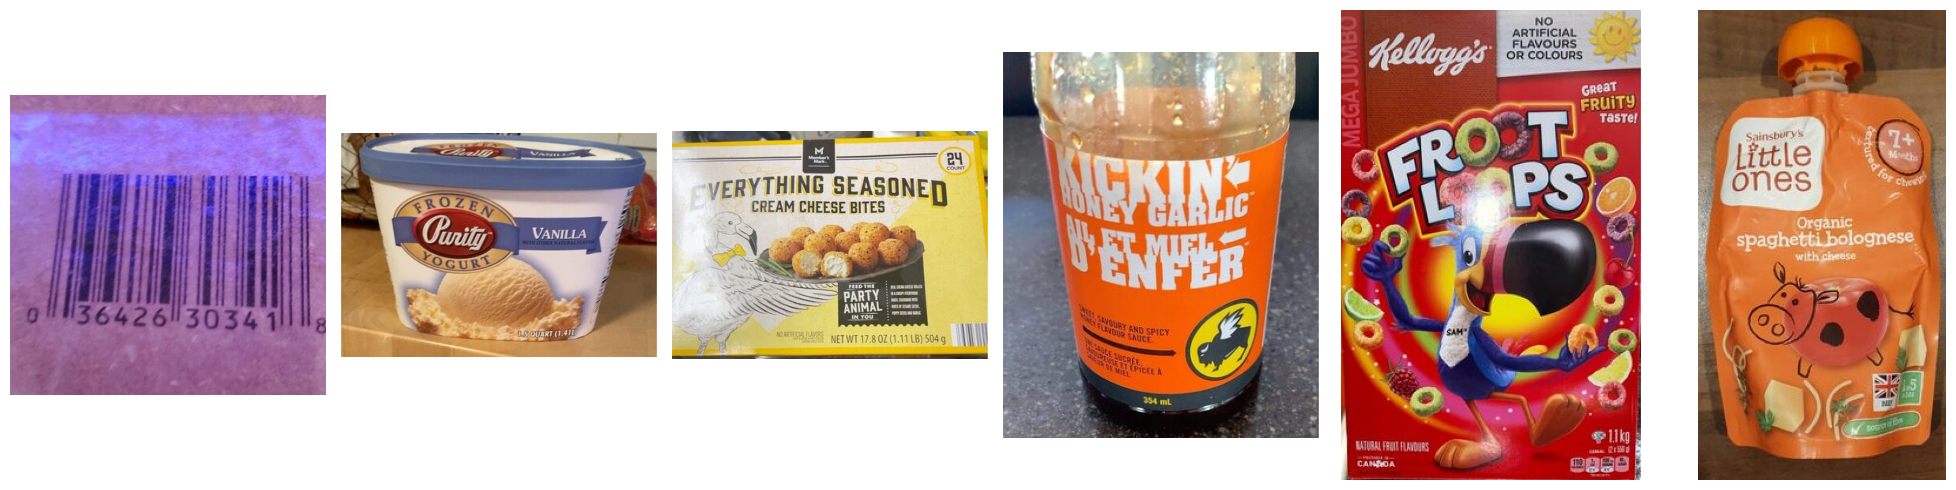

In [ ]:

plot_sample_images(df_sample[~df_sample['image_url'].isna()], 'image_url', sample_size=6)

c:\Users\inesad00\Downloads


Image 1 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/0000207025004/nutrition_de.3.400.jpg
Image 2 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/00003429145/nutrition_es.7.400.jpg
Image 3 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/00026772226/nutrition_fr.5.400.jpg
Image 4 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/003327986/nutrition_es.5.400.jpg
Image 5 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/004128579/nutrition_es.5.400.jpg
Image 6 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/004622327/nutrition_es.5.400.jpg
Image 7 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/000/006021/nutrition_en.5.400.jpg
Image 8 fetched successfully from: https://images.openfoodfacts.org/images/products/000/000/

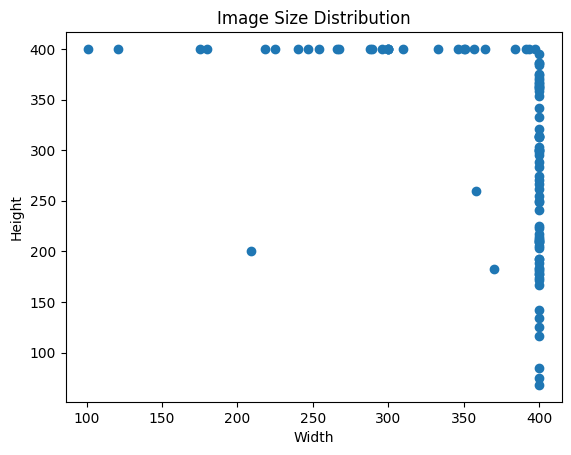

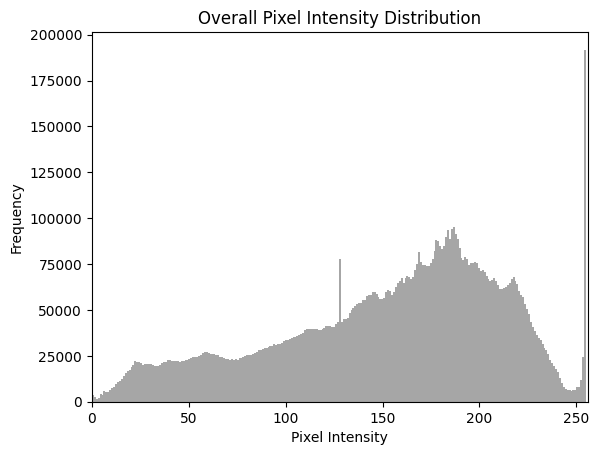

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Function to fetch image from URL and decode it without saving locally
def fetch_image_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        # Convert the response content to a numpy array and decode it into an image
        image = np.array(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        
        # Check if image was successfully downloaded and decoded
        if image is None:
            print(f"Failed to decode image from {url}")
            return None
        return image
    else:
        print(f"Failed to download image from {url}")
        return None

# Function to plot color histograms
def plot_color_histogram(image):
    channels = cv2.split(image)
    colors = ('b', 'g', 'r')
    plt.figure()
    plt.title("Color Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Number of Pixels")
    
    # Plot histogram for each color channel
    for channel, color in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    
    plt.show()

# Function to plot image size distribution
def plot_image_size_distribution(image_sizes):
    widths, heights = zip(*image_sizes)
    plt.figure()
    plt.title("Image Size Distribution")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.scatter(widths, heights)
    plt.show()

# Function to plot overall pixel intensity distribution
def plot_pixel_distribution(all_pixels):
    plt.figure()
    plt.title("Overall Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # Flatten all pixel intensities and plot histogram
    all_pixels = np.concatenate(all_pixels, axis=None)
    plt.hist(all_pixels, bins=256, color='gray', alpha=0.7)
    plt.xlim([0, 256])
    plt.show()

# ---- Execution ----

# List of image URLs
url_list = df_sample[~df_sample['image_nutrition_url'].isna()]['image_nutrition_url'][:100].to_list()

# Lists to store image sizes and pixel intensities across all images
image_sizes = []
all_pixels = []

# Iterate through each URL, fetch the image, and analyze it
for index, url in enumerate(url_list):
    image = fetch_image_from_url(url)

    if image is not None:
        print(f"Image {index+1} fetched successfully from: {url}")
        
        # Step 1: Store image size (width, height)
        height, width, _ = image.shape
        image_sizes.append((width, height))

        # Step 2: Flatten pixel values (grayscale version) and store
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        all_pixels.append(gray_image.flatten())

# Step 3: Plot image size distribution (code from before)
plot_image_size_distribution(image_sizes)

# Step 4: Plot pixel intensity distribution (code from before)
plot_pixel_distribution(all_pixels)

In [55]:
def plot_top_items(data, column, title, count = True):
    # Count occurrences of each item
    if count:
        item_count = data[column].value_counts().reset_index()
        item_count.columns = [column, 'count']
    else:
        item_count = data.sort_values(by='count', ascending=False)

    # Get the top 20 items
    top_20_items = item_count.head(20)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(top_20_items[column], top_20_items['count'], color='skyblue')
    plt.xlabel('Count')
    plt.title(title)
    plt.gca().invert_yaxis()  # To display the highest count at the top

    # Descriptive statistics
    stats = item_count['count'].describe()

    # Annotate the plot with statistics in the lower right corner
    stats_text = (f"Count Statistics:\n"
                  f"Count: {stats['count']:.0f}\n"
                  f"Mean: {stats['mean']:.2f}\n"
                  f"Std: {stats['std']:.2f}\n"
                  f"Min: {stats['min']:.0f}\n"
                  f"25%: {stats['25%']:.0f}\n"
                  f"50%: {stats['50%']:.0f}\n"
                  f"75%: {stats['75%']:.0f}\n"
                  f"Max: {stats['max']:.0f}")

    plt.text(0.95, 0.05, stats_text, ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.5))

    plt.show()

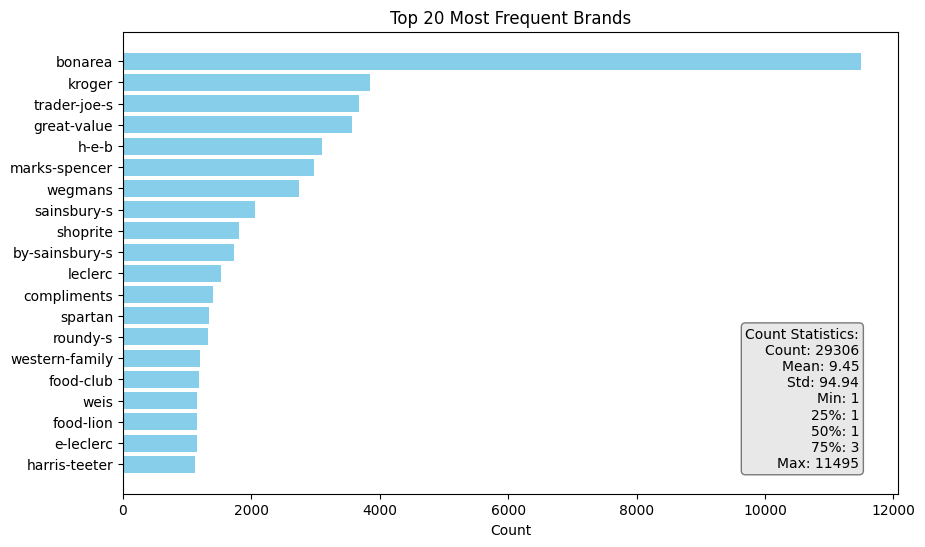

In [57]:
# Example usage:
plot_top_items(processed, 'brands_tags', 'Top 20 Most Frequent Brands')

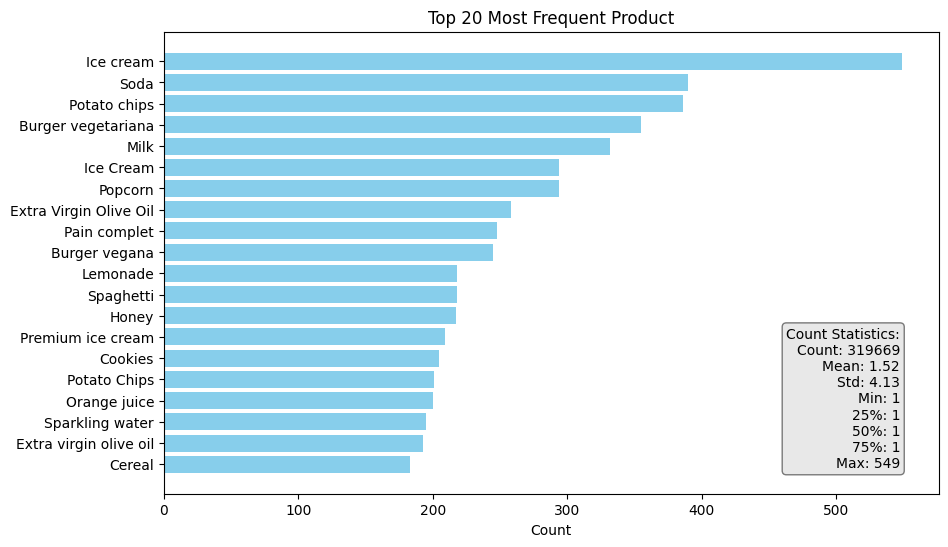

In [58]:
plot_top_items(processed, 'product_name', 'Top 20 Most Frequent Product')

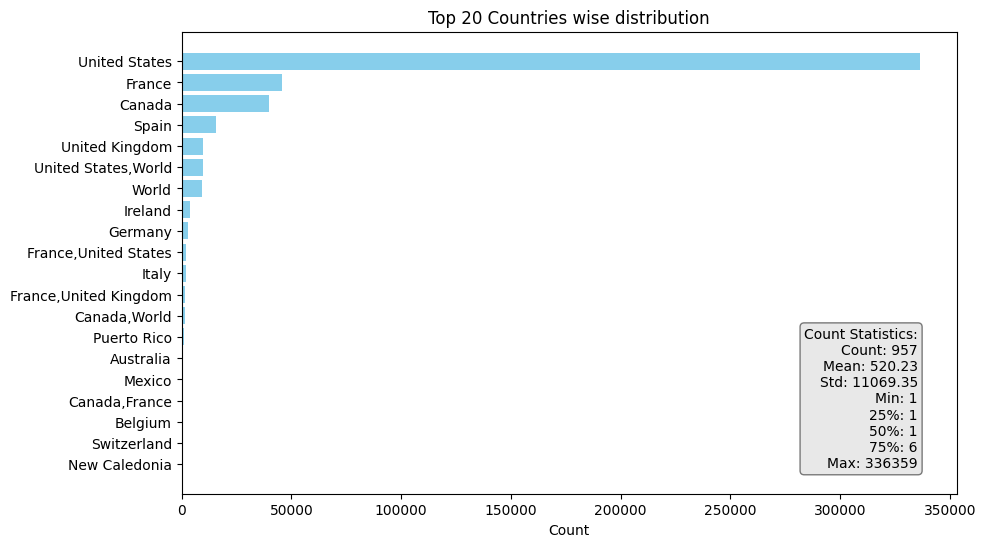

In [59]:
plot_top_items(processed, 'countries_en', 'Top 20 Countries wise distribution')


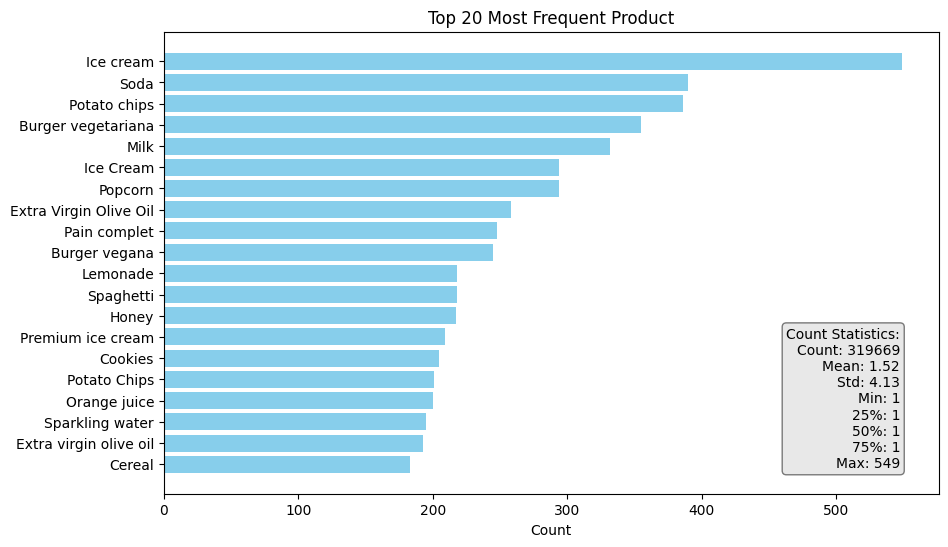

In [60]:
plot_top_items(processed, 'product_name', 'Top 20 Most Frequent Product')

In [ ]:
all_categories = df['categories_en'].dropna().str.split(',').explode()

# Count occurrences of each element
category_counts = Counter(all_categories)
category_counts_df = pd.DataFrame(category_counts.items(), columns=['Category', 'count'])

In [ ]:

all_categories = df['ingredients_tags'].dropna().str.split(',').explode()

# Count occurrences of each element
ingredients_counts = Counter(all_categories)
ingredients_counts_df = pd.DataFrame(category_counts.items(), columns=['ingredients', 'count'])

In [ ]:

all_categories = df['food_groups_en'].dropna().str.split(',').explode()

# Count occurrences of each element
food_groups_counts = Counter(all_categories)
food_groups_counts_df = pd.DataFrame(food_groups_counts.items(), columns=['food_group', 'count'])

In [ ]:
plot_top_items(food_groups_counts_df, 'food_group', 'Top 20 Most Frequent Food Group',count=False)

In [ ]:
plot_top_items(ingredients_counts_df, 'ingredients', 'Top 20 Most Frequent ingredients',count=False)

In [ ]:
plot_top_items(category_counts_df, 'Category', 'Top 20 Most Frequent Categories',count=False)

In [88]:
data = {
    "Category": [
        "Nutritional Information",
        "Ingredient Information",
        "Allergen Information",
        "Serving Information",
        "Product Information",
        "Packaging Information",
        "Regulatory Information",
        "Environmental Information",
        "User-Generated Content"
    ],
    "Entities": [
        "- Energy Content (kJ, kcal)\n- Macronutrients:\n  - Total Fat\n  - Saturated Fat\n  - Carbohydrates\n  - Sugars\n  - Protein\n  - Fiber\n- Micronutrients:\n  - Vitamins (A, C, D, etc.)\n  - Minerals (Calcium, Iron, Potassium, etc.)",
        "- Ingredients List\n- Ingredients Tags\n- Image URL for Ingredients",
        "- Specific Allergens (e.g., nuts, gluten)",
        "- Serving Size\n- Serving Quantity",
        "- Product Name\n- Brand\n- Categories (e.g., snacks, beverages)\n- Labels (e.g., vegan, gluten-free)\n- Product SKU",
        "- Image URLs\n- Barcode",
        "- Nutritional Claims (e.g., 'low fat', 'high in fiber')",
        "- Sustainability Tags",
        "- Comments or Reviews"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
csv_file_path = 'open_food_facts_entities.csv'
df.to_csv(csv_file_path, index=False)